In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import math

In [2]:
df = pd.read_csv('Medical_Cost.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
print(len(df.index))

1338


<AxesSubplot:xlabel='sex', ylabel='count'>

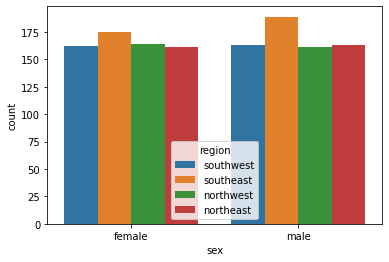

In [41]:
sns.countplot(x='sex',hue='region', data=df)

<AxesSubplot:ylabel='Frequency'>

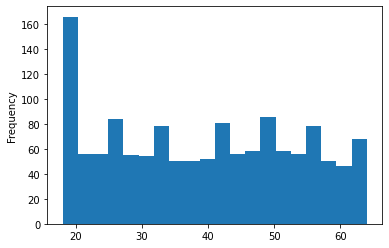

In [48]:
df["age"].plot.hist(bins=20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
sex = pd.get_dummies(df['sex'], drop_first=True)

In [5]:
smoker = pd.get_dummies(df['smoker'], drop_first=True)


In [6]:
region = pd.get_dummies(df['region'])


In [7]:
df = pd.concat([df,sex,smoker,region], axis=1)

In [8]:
df

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,0,1


In [9]:
df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

In [10]:
df.rename(columns={'yes':'smoker'})

,age,bmi,children,charges,male,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


## Train/Test

In [11]:
X=df.drop(['charges'], axis=1)
y=df['charges']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
y_train

332     13429.03540
355     24603.04837
138     27322.73386
381     42303.69215
292     42112.23560
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 936, dtype: float64

In [16]:
X_train

,age,bmi,children,male,yes,northeast,northwest,southeast,southwest
332,61,31.160,0,0,0,0,1,0,0
355,46,27.600,0,1,0,0,0,0,1
138,54,31.900,3,0,0,0,0,1,0
381,55,30.685,0,1,1,1,0,0,0
292,25,45.540,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,0,0,1,0,0,0
1130,39,23.870,5,0,0,0,0,1,0
1294,58,25.175,0,1,0,1,0,0,0
860,37,47.600,2,0,1,0,0,0,1


# Standardizing train Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
 scaler = StandardScaler()

In [20]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_test=scaler.transform(X_test)

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
regression = LinearRegression()

In [28]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=10)

In [29]:
np.mean(mse)

-38501792.55189899

# prediction

In [33]:
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
reg_pred=regression.predict(X_test)

C:\Users\SHAHEEN\anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

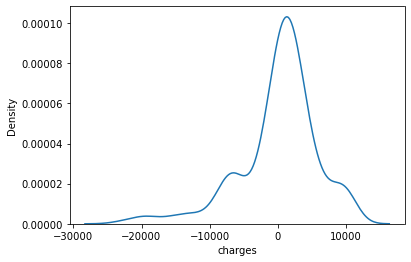

In [51]:
sns.distplot(reg_pred-y_test,kde=True, hist=False, bins=50)

In [45]:
from sklearn.metrics import r2_score

In [46]:
score=r2_score(reg_pred,y_test)

In [47]:
score

0.6951806365604831

Text(0, 0.5, 'Predicted Y')

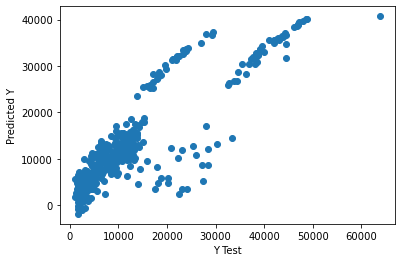

In [48]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))

MAE: 4118.9462709278305
MSE: 33791761.12770165
RMSE: 5813.068133757048


In [53]:
coeffecients = pd.DataFrame(regression.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,3.680776e+03
bmi,2.041494e+03
children,5.763121e+02
male,6.697044e+01
yes,9.647601e+03
northeast,3.469416e+17
northwest,3.411009e+17
southeast,3.483400e+17
southwest,3.375056e+17
